In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


In [51]:
df = pd.read_csv("population_estimates_2.csv")

In [52]:
df.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,0 - 14 years,Male,Thousand,434.6
1,Population Estimates (Persons in April),1950,0 - 14 years,Female,Thousand,416.6
2,Population Estimates (Persons in April),1950,15 - 24 years,Male,Thousand,234.9
3,Population Estimates (Persons in April),1950,15 - 24 years,Female,Thousand,217.7
4,Population Estimates (Persons in April),1950,25 - 44 years,Male,Thousand,393.4


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,740.0,1986.500000,21.374456,1950.0,1968.00,1986.5,2005.000,2023.0
VALUE,740.0,364.134459,141.049992,149.3,281.45,321.3,462.175,749.6


In [54]:
df.drop("UNIT",axis=1)

,STATISTIC Label,Year,Age Group,Sex,VALUE
0,Population Estimates (Persons in April),1950,0 - 14 years,Male,434.6
1,Population Estimates (Persons in April),1950,0 - 14 years,Female,416.6
2,Population Estimates (Persons in April),1950,15 - 24 years,Male,234.9
3,Population Estimates (Persons in April),1950,15 - 24 years,Female,217.7
4,Population Estimates (Persons in April),1950,25 - 44 years,Male,393.4
...,...,...,...,...,...
735,Population Estimates (Persons in April),2023,25 - 44 years,Female,749.6
736,Population Estimates (Persons in April),2023,45 - 64 years,Male,661.5
737,Population Estimates (Persons in April),2023,45 - 64 years,Female,677.2
738,Population Estimates (Persons in April),2023,65 years and over,Male,379.9


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  740 non-null    object 
 1   Year             740 non-null    int64  
 2   Age Group        740 non-null    object 
 3   Sex              740 non-null    object 
 4   UNIT             740 non-null    object 
 5   VALUE            740 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 34.8+ KB


In [56]:
df["Age Group"].unique()

array(['0 - 14 years', '15 - 24 years', '25 - 44 years', '45 - 64 years',
       '65 years and over'], dtype=object)

In [57]:
df.isnull().values.any()

False

In [58]:
X = df.iloc[:,1:4].values  
y = df.iloc[:,-1].values 

In [59]:
le=LabelEncoder()
df["Age Group"] = le.fit_transform(df["Age Group"])

In [60]:
df["Sex"] = le.fit_transform(df["Sex"])

In [61]:
df["Year"] = le.fit_transform(df["Year"])

In [62]:
df

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),0,0,1,Thousand,434.6
1,Population Estimates (Persons in April),0,0,0,Thousand,416.6
2,Population Estimates (Persons in April),0,1,1,Thousand,234.9
3,Population Estimates (Persons in April),0,1,0,Thousand,217.7
4,Population Estimates (Persons in April),0,2,1,Thousand,393.4
...,...,...,...,...,...,...
735,Population Estimates (Persons in April),73,2,0,Thousand,749.6
736,Population Estimates (Persons in April),73,3,1,Thousand,661.5
737,Population Estimates (Persons in April),73,3,0,Thousand,677.2
738,Population Estimates (Persons in April),73,4,1,Thousand,379.9


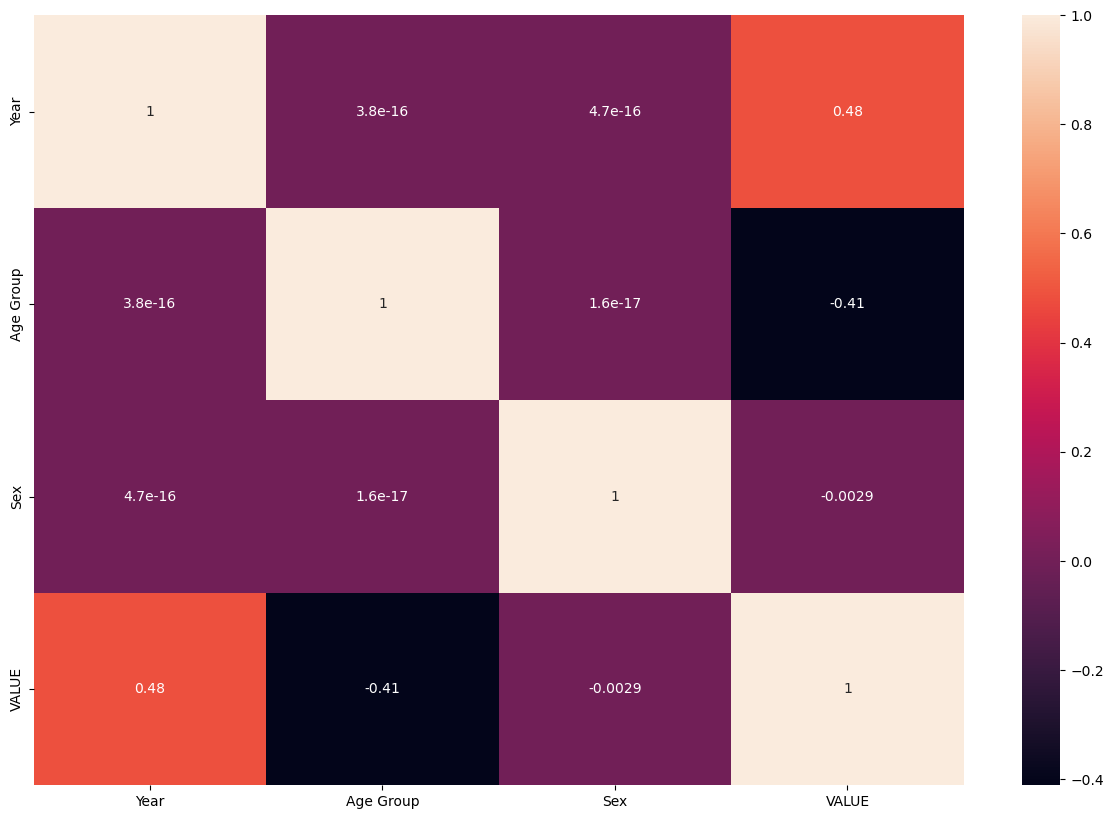

In [63]:
import matplotlib.pyplot as plt 
import seaborn as sb
corr_= df.corr()
plt.figure(figsize=(15,10))
sb.heatmap(corr_,annot=True)
plt.show()

In [64]:
labelencoder_X=LabelEncoder()
X[:,-2] = labelencoder_X.fit_transform(X[:,-2])
print(X)

[[1950 0 'Male']
 [1950 0 'Female']
 [1950 1 'Male']
 ...
 [2023 3 'Female']
 [2023 4 'Male']
 [2023 4 'Female']]


In [65]:
labelencoder_X=LabelEncoder()
X[:,-1] = labelencoder_X.fit_transform(X[:,-1])
print(X)

[[1950 0 1]
 [1950 0 0]
 [1950 1 1]
 ...
 [2023 3 0]
 [2023 4 1]
 [2023 4 0]]


In [66]:
labelencoder_X=LabelEncoder()
X[:,-3] = labelencoder_X.fit_transform(X[:,-3])
print(X)

[[0 0 1]
 [0 0 0]
 [0 1 1]
 ...
 [73 3 0]
 [73 4 1]
 [73 4 0]]


In [67]:
np.unique(X[:,-2])


array([0, 1, 2, 3, 4], dtype=object)

In [68]:
np.unique(X[:,-1])

array([0, 1], dtype=object)

In [69]:
np.unique(X[:,-3])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73], dtype=object)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  740 non-null    object 
 1   Year             740 non-null    int64  
 2   Age Group        740 non-null    int32  
 3   Sex              740 non-null    int32  
 4   UNIT             740 non-null    object 
 5   VALUE            740 non-null    float64
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 29.0+ KB


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline

<AxesSubplot:xlabel='Age Group'>

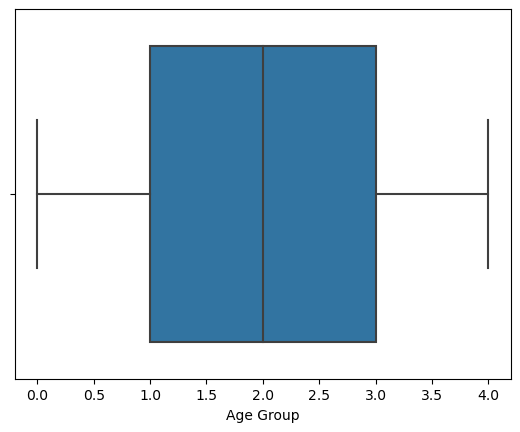

In [72]:
sns.boxplot(x = "Age Group", data = df)

<AxesSubplot:xlabel='Year'>

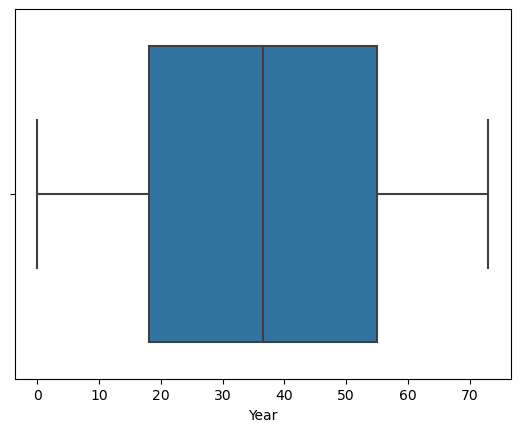

In [73]:
sns.boxplot(x = "Year", data = df)

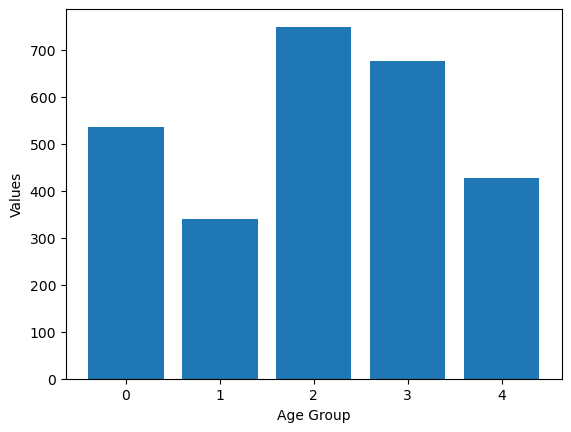

In [74]:
import matplotlib.pyplot as plt 
plt.bar(df["Age Group"],df["VALUE"])
plt.xlabel('Age Group')
plt.ylabel("Values")

plt.show()

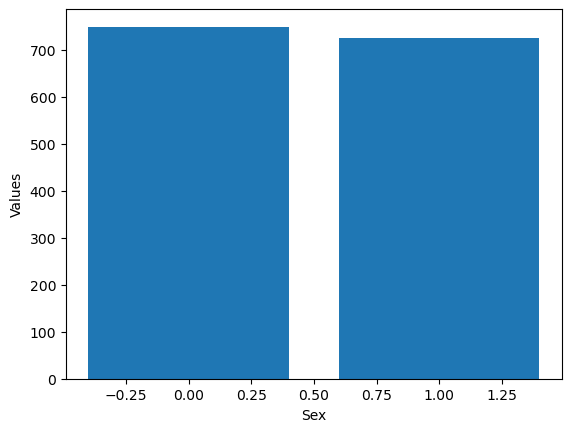

In [75]:
plt.bar(df["Sex"],df["VALUE"])
plt.xlabel('Sex')
plt.ylabel("Values")

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VALUE', ylabel='Density'>

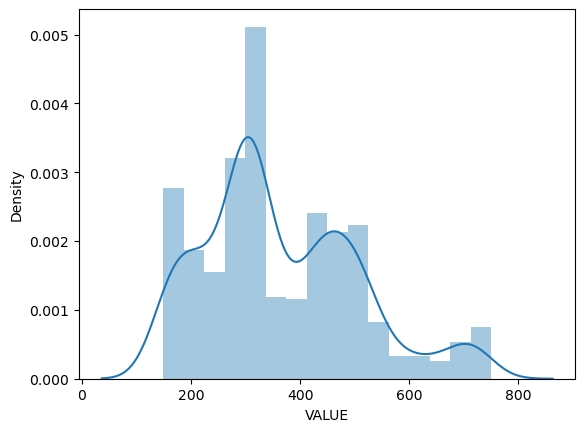

In [76]:
sns.distplot(df['VALUE'])

In [77]:
df.corr()

,Year,Age Group,Sex,VALUE
Year,1.000000e+00,3.820731e-16,4.720047e-16,0.482780
Age Group,3.820731e-16,1.000000e+00,1.612527e-17,-0.411442
Sex,4.720047e-16,1.612527e-17,1.000000e+00,-0.002944
VALUE,4.827801e-01,-4.114422e-01,-2.944209e-03,1.000000


In [78]:
print(X.shape)
print(type(X))

(740, 3)
<class 'numpy.ndarray'>


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
ln = LinearRegression()
ln.fit(X_train,y_train)

LinearRegression()

In [83]:
predictions = ln.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

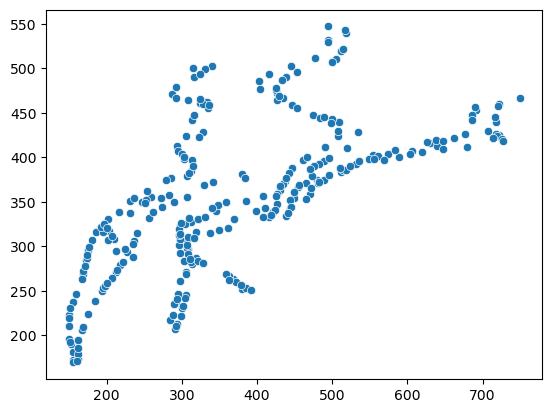

In [84]:
sns.scatterplot(y_test,predictions)

In [85]:
ln.score(X_test,y_test)

0.4028761714544208